<a href="https://colab.research.google.com/github/AlvinNH11/AlvinNH11/blob/main/UAS_BigDataPrediktif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UAS BIG DATA PREDIKTIF ANALYTICS LANJUT**


**Anggota Kelompok: </br>**
1. Wijayanto Agung Wibowo 22.11.4552
2. Ghifary Zulvan Novic 22.11.4551
3. Alvin Nauval Harits 22.11.4546


#Akuisisi Data

In [ ]:
#Download dataset dari kaggle publik dataset

import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("rahmasleam/breast-cancer")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 13.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rahmasleam/breast-cancer/versions/1


In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
from pyspark.sql.functions import col, countDistinct, count, when, isnan, isnull
from pyspark.sql.types import IntegerType, StringType, NumericType

In [ ]:
# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        file_path = os.path.join(path, filename)
        break  # Stop after finding the first CSV file

# Now, read the CSV file using the correct file path
df = pd.read_csv(file_path)

print("Path to dataset files:", file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/rahmasleam/breast-cancer/versions/1/breast-cancer.csv


In [ ]:
#akuisisi data ke sparkdataframe
df = spark.read.csv(path, header = True, inferSchema = True)

In [ ]:
#Tampilkan sample data
df.show(5)

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+---------+-----------+------------+---

# **Data Preprosesing**

In [ ]:
#Memeriksa tipe data
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radi

In [ ]:
# Mengganti nama kolom agar lebih mudah dipahami
df = df.withColumnRenamed("radius_mean", "average_radius") \
       .withColumnRenamed("texture_mean", "average_texture") \
       .withColumnRenamed("perimeter_mean", "average_perimeter") \
       .withColumnRenamed("area_mean", "average_area") \
       .withColumnRenamed("smoothness_mean", "average_smoothness") \
       .withColumnRenamed("compactness_mean", "average_compactness") \
       .withColumnRenamed("concavity_mean", "average_concavity") \
       .withColumnRenamed("concave points_mean", "average_concave_points") \
       .withColumnRenamed("symmetry_mean", "average_symmetry") \
       .withColumnRenamed("fractal_dimension_mean", "average_fractal_dimension") \
       .withColumnRenamed("radius_se", "radius_standard_error") \
       .withColumnRenamed("texture_se", "texture_standard_error") \
       .withColumnRenamed("perimeter_se", "perimeter_standard_error") \
       .withColumnRenamed("area_se", "area_standard_error") \
       .withColumnRenamed("smoothness_se", "smoothness_standard_error") \
       .withColumnRenamed("compactness_se", "compactness_standard_error") \
       .withColumnRenamed("concavity_se", "concavity_standard_error") \
       .withColumnRenamed("concave points_se", "concave_points_standard_error") \
       .withColumnRenamed("symmetry_se", "symmetry_standard_error") \
       .withColumnRenamed("fractal_dimension_se", "fractal_dimension_standard_error") \
       .withColumnRenamed("radius_worst", "worst_radius") \
       .withColumnRenamed("texture_worst", "worst_texture") \
       .withColumnRenamed("perimeter_worst", "worst_perimeter") \
       .withColumnRenamed("area_worst", "worst_area") \
       .withColumnRenamed("smoothness_worst", "worst_smoothness") \
       .withColumnRenamed("compactness_worst", "worst_compactness") \
       .withColumnRenamed("concavity_worst", "worst_concavity") \
       .withColumnRenamed("concave points_worst", "worst_concave_points") \
       .withColumnRenamed("symmetry_worst", "worst_symmetry") \
       .withColumnRenamed("fractal_dimension_worst", "worst_fractal_dimension")

In [ ]:
# Memeriksa nilai null di setiap kolom
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+---+---------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+---------------------+----------------------+------------------------+-------------------+-------------------------+--------------------------+------------------------+-----------------------------+-----------------------+--------------------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
| id|diagnosis|average_radius|average_texture|average_perimeter|average_area|average_smoothness|average_compactness|average_concavity|average_concave_points|average_symmetry|average_fractal_dimension|radius_standard_error|texture_standard_error|perimeter_standard_error|area_standard_error|smoothness_standard_error|compactness_standard_error|concavity_standard_error|concave_poi

In [ ]:
# Menampilkan summary
df.describe().show()

+-------+--------------------+---------+------------------+-----------------+-----------------+-----------------+--------------------+-------------------+-------------------+----------------------+--------------------+-------------------------+---------------------+----------------------+------------------------+-------------------+-------------------------+--------------------------+------------------------+-----------------------------+-----------------------+--------------------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+-------------------+--------------------+-------------------+-----------------------+
|summary|                  id|diagnosis|    average_radius|  average_texture|average_perimeter|     average_area|  average_smoothness|average_compactness|  average_concavity|average_concave_points|    average_symmetry|average_fractal_dimension|radius_standard_error|texture_standard_error|perimeter_

In [ ]:
#Menghapus kolom ID yang tidak penting
df = df.drop("id")

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, when


# Gabungkan semua kolom numerik menjadi satu vektor untuk perhitungan korelasi
feature_columns = [col for col in df.columns if col not in ['id', 'diagnosis', 'label']]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_vector = assembler.transform(df)

# Hitung matriks korelasi
correlation_matrix = Correlation.corr(df_vector, "features").head()[0]
print("Matriks Korelasi:\n", correlation_matrix.toArray())


Matriks Korelasi:
 [[ 1.00000000e+00  3.23781891e-01  9.97855281e-01  9.87357170e-01
   1.70581187e-01  5.06123578e-01  6.76763550e-01  8.22528522e-01
   1.47741242e-01 -3.11630826e-01  6.79090388e-01 -9.73174431e-02
   6.74171616e-01  7.35863663e-01 -2.22600125e-01  2.05999980e-01
   1.94203623e-01  3.76168956e-01 -1.04320881e-01 -4.26412691e-02
   9.69538973e-01  2.97007644e-01  9.65136514e-01  9.41082460e-01
   1.19616140e-01  4.13462823e-01  5.26911462e-01  7.44214198e-01
   1.63953335e-01  7.06588569e-03]
 [ 3.23781891e-01  1.00000000e+00  3.29533059e-01  3.21085696e-01
  -2.33885160e-02  2.36702222e-01  3.02417828e-01  2.93464051e-01
   7.14009805e-02 -7.64371834e-02  2.75868676e-01  3.86357623e-01
   2.81673115e-01  2.59844987e-01  6.61377735e-03  1.91974611e-01
   1.43293077e-01  1.63851025e-01  9.12716776e-03  5.44575196e-02
   3.52572947e-01  9.12044589e-01  3.58039575e-01  3.43545947e-01
   7.75033588e-02  2.77829592e-01  3.01025224e-01  2.95315843e-01
   1.05007910e-01  1.1

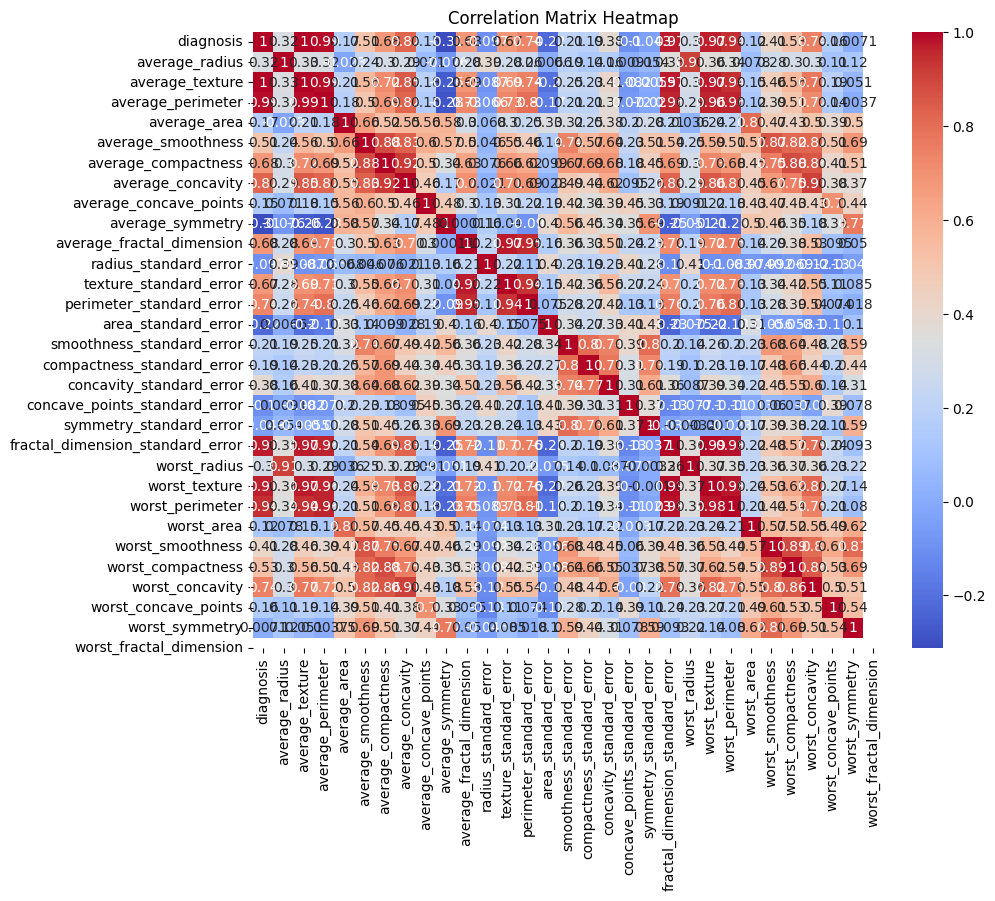

In [ ]:
# Menampilkan matriks korelasi
# Convert the correlation matrix to a Pandas DataFrame for easier visualization
correlation_array = correlation_matrix.toArray()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_array, annot=True, cmap='coolwarm', xticklabels=df.columns, yticklabels=df.columns)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
df.show(5)

+---------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+---------------------+----------------------+------------------------+-------------------+-------------------------+--------------------------+------------------------+-----------------------------+-----------------------+--------------------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|diagnosis|average_radius|average_texture|average_perimeter|average_area|average_smoothness|average_compactness|average_concavity|average_concave_points|average_symmetry|average_fractal_dimension|radius_standard_error|texture_standard_error|perimeter_standard_error|area_standard_error|smoothness_standard_error|compactness_standard_error|concavity_standard_error|concave_points_stan

# **Eksploratory Data Analisis**

Bar Chart untuk Distribusi Diagnosis
Bar chart berguna untuk melihat distribusi diagnosis antara 'M' (Malignant) dan 'B' (Benign).

Bar chart ini akan menunjukkan jumlah kasus kanker yang didiagnosis sebagai 'M' atau 'B'.
Ini membantu memahami apakah dataset ini seimbang atau tidak dalam hal jumlah sampel per kelas.

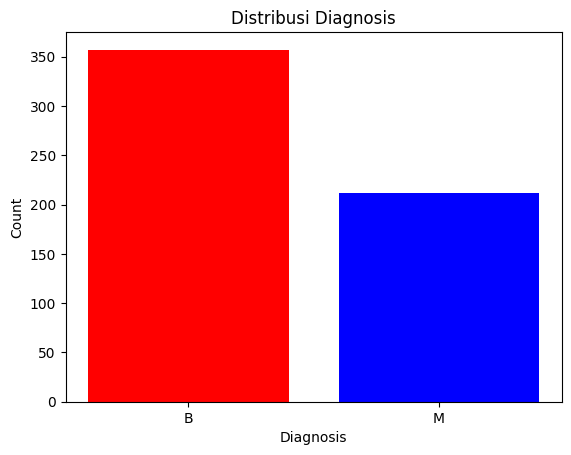

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah diagnosis 'M' dan 'B'
diagnosis_counts = df.groupBy("diagnosis").count().collect()
diagnosis_dict = {row['diagnosis']: row['count'] for row in diagnosis_counts}

# Membuat bar chart
plt.bar(diagnosis_dict.keys(), diagnosis_dict.values(), color=['red', 'blue'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribusi Diagnosis')
plt.show()


Pie Chart untuk Proporsi Diagnosis
Pie chart memberikan visualisasi proporsi diagnosis 'M' dan 'B'.

Penjelasan:
Pie chart ini membantu melihat proporsi relatif dari diagnosis 'M' dan 'B' di dataset.
Ini memberikan gambaran tentang distribusi kelas secara keseluruhan.

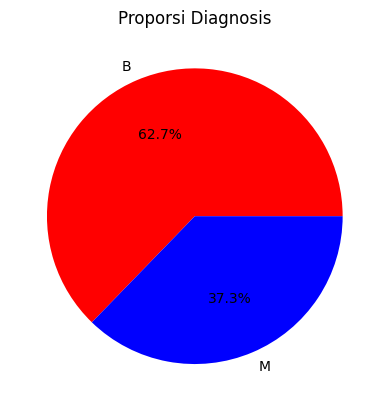

In [ ]:
# Membuat pie chart
plt.pie(diagnosis_dict.values(), labels=diagnosis_dict.keys(), autopct='%1.1f%%', colors=['red', 'blue'])
plt.title('Proporsi Diagnosis')
plt.show()


Histogram untuk Distribusi radius_mean
Histogram digunakan untuk melihat distribusi salah satu fitur numerik, misalnya radius_mean.

Penjelasan:
Histogram ini akan menunjukkan bagaimana nilai radius_mean tersebar di seluruh dataset.
Ini membantu mengidentifikasi pola distribusi seperti apakah data normal, skewed, atau memiliki outlier.

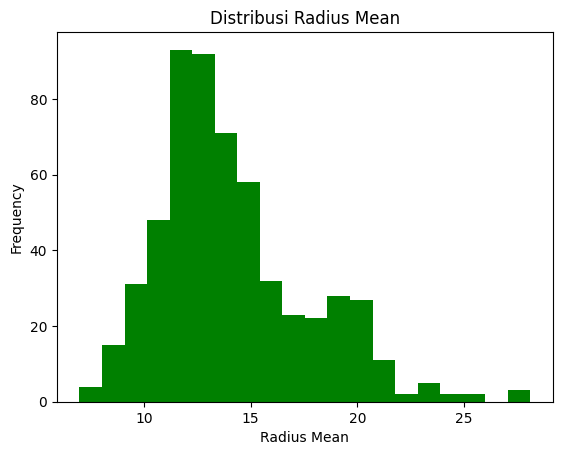

In [ ]:
# Mengambil data average_radius (previously radius_mean)
radius_mean_data = df.select("average_radius").rdd.flatMap(lambda x: x).collect()

# Membuat histogram
plt.hist(radius_mean_data, bins=20, color='green')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Distribusi Radius Mean')
plt.show()

Scatter Plot untuk Hubungan antara radius_mean dan texture_mean

Scatter plot ini akan menunjukkan hubungan antara radius_mean dan texture_mean.
Ini membantu mengidentifikasi apakah ada korelasi antara kedua fitur tersebut.

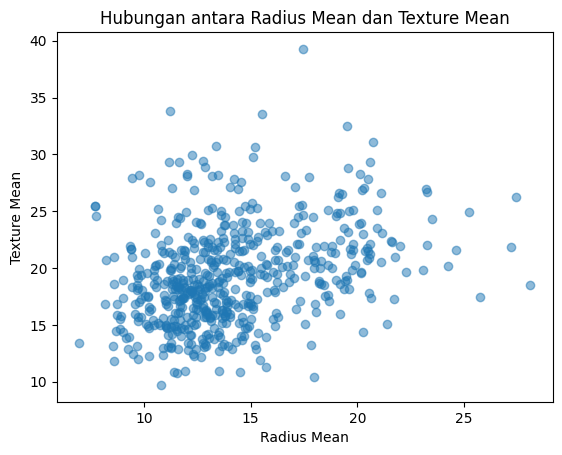

In [ ]:
# Mengambil data untuk scatter plot
radius_mean_data = df.select("average_radius").rdd.flatMap(lambda x: x).collect()
texture_mean_data = df.select("average_texture").rdd.flatMap(lambda x: x).collect()


# Membuat scatter plot
plt.scatter(radius_mean_data, texture_mean_data, alpha=0.5)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Hubungan antara Radius Mean dan Texture Mean')
plt.show()

# MODELING

Kita akan mempersiapkan data dengan VectorAssembler dan membagi data menjadi training dan test set.

In [ ]:
#Import Library
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# Assemble features into a single vector column
feature_columns = df.columns[1:]  # excluding 'diagnosis' column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)
df.show(5)

+---------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+---------------------+----------------------+------------------------+-------------------+-------------------------+--------------------------+------------------------+-----------------------------+-----------------------+--------------------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+--------------------+
|diagnosis|average_radius|average_texture|average_perimeter|average_area|average_smoothness|average_compactness|average_concavity|average_concave_points|average_symmetry|average_fractal_dimension|radius_standard_error|texture_standard_error|perimeter_standard_error|area_standard_error|smoothness_standard_error|compactness_standard_error|concavity_standard_erro

In [ ]:
# Convert 'diagnosis' column ke binary label (e.g., M = 1, B = 0)
df = df.withColumn('label', (df['diagnosis'] == 'M').cast('integer'))

In [ ]:
df.show(5)

+---------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+---------------------+----------------------+------------------------+-------------------+-------------------------+--------------------------+------------------------+-----------------------------+-----------------------+--------------------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+--------------------+-----+
|diagnosis|average_radius|average_texture|average_perimeter|average_area|average_smoothness|average_compactness|average_concavity|average_concave_points|average_symmetry|average_fractal_dimension|radius_standard_error|texture_standard_error|perimeter_standard_error|area_standard_error|smoothness_standard_error|compactness_standard_error|concavity_standar

In [ ]:
df.printSchema()

root
 |-- diagnosis: string (nullable = true)
 |-- average_radius: double (nullable = true)
 |-- average_texture: double (nullable = true)
 |-- average_perimeter: double (nullable = true)
 |-- average_area: double (nullable = true)
 |-- average_smoothness: double (nullable = true)
 |-- average_compactness: double (nullable = true)
 |-- average_concavity: double (nullable = true)
 |-- average_concave_points: double (nullable = true)
 |-- average_symmetry: double (nullable = true)
 |-- average_fractal_dimension: double (nullable = true)
 |-- radius_standard_error: double (nullable = true)
 |-- texture_standard_error: double (nullable = true)
 |-- perimeter_standard_error: double (nullable = true)
 |-- area_standard_error: double (nullable = true)
 |-- smoothness_standard_error: double (nullable = true)
 |-- compactness_standard_error: double (nullable = true)
 |-- concavity_standard_error: double (nullable = true)
 |-- concave_points_standard_error: double (nullable = true)
 |-- symmetry

### Split Data ke testing dan training

In [ ]:
train_df, test_df = df.randomSplit([0.8, 0.2], seed=2025)

## Train Models

### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(featuresCol='features', labelCol='label', numTrees=10) #setting Random Forest jumlah tree = 10
rf_model = rf.fit(train_df)
rf_predictions = rf_model.transform(test_df)

### Gradient Boosted Tree Classifier

In [ ]:
gbt = GBTClassifier(featuresCol='features', labelCol='label', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)

### Logistic Regression

In [ ]:
lr = LogisticRegression(featuresCol='features', labelCol='label')
lr_model = lr.fit(train_df)
lr_predictions = lr_model.transform(test_df)

### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(featuresCol='features', labelCol='label')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)


## Evaluasi Model

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator # Import Evaluasi library

accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='f1')
precision_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedPrecision')
recall_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedRecall')
auc_evaluator = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='rawPrediction', metricName='areaUnderROC')

In [ ]:
models_predictions = {
    "Random Forest": rf_predictions,
    "Gradient Boosted Tree": gbt_predictions,
    "Logistic Regression": lr_predictions,
    "Decision Tree": dt_predictions
}

for model_name, predictions in models_predictions.items():
    accuracy = accuracy_evaluator.evaluate(predictions)
    f1_score = f1_evaluator.evaluate(predictions)
    precision = precision_evaluator.evaluate(predictions)
    recall = recall_evaluator.evaluate(predictions)
    auc = auc_evaluator.evaluate(predictions)

    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1_score:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {auc:.4f}")


Random Forest - Accuracy: 0.9421, F1 Score: 0.9421, Precision: 0.9421, Recall: 0.9421, AUC: 0.9923
Gradient Boosted Tree - Accuracy: 0.9421, F1 Score: 0.9422, Precision: 0.9425, Recall: 0.9421, AUC: 0.9912
Logistic Regression - Accuracy: 0.9669, F1 Score: 0.9670, Precision: 0.9677, Recall: 0.9669, AUC: 0.9932
Decision Tree - Accuracy: 0.9421, F1 Score: 0.9422, Precision: 0.9425, Recall: 0.9421, AUC: 0.9066


## Models Selection & Tuning

pilih dua model dengan performa terbaik dan lakukan hyperparameter tuning

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

### Gradient Boosted Tree

In [ ]:
# Gradient Boosted Tree (GBT) Parameter Grid
gbt_paramGrid = (ParamGridBuilder()
                 .addGrid(gbt.maxDepth, [5, 10, 15])
                 .addGrid(gbt.maxBins, [32, 64, 128])
                 .addGrid(gbt.maxIter, [10, 20, 30])
                 .build())

In [ ]:
# Set up cross-validation for GBT
gbt_crossval = CrossValidator(estimator=gbt,
                              estimatorParamMaps=gbt_paramGrid,
                              evaluator=evaluator,
                              numFolds=5)

### Logistic Regression

In [ ]:
# Set up a parameter grid for hyperparameter tuning
lr_paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 0.5, 1.0])  # Regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])  # ElasticNet parameter (L1, L2 mix)
             .addGrid(lr.maxIter, [10, 50, 100])  # Max iterations
             .addGrid(lr.tol, [1e-4, 1e-3])  # Tolerance
             .build())

In [ ]:
# Set up cross-validation for LR
lr_crossval = CrossValidator(estimator=lr,
                             estimatorParamMaps=lr_paramGrid,
                             evaluator=evaluator,
                             numFolds=5)

### Buat Evaluator dan fit Model dengan tuning

In [ ]:
models_tuning = {
    "Gradient Boosted Tree": (gbt_crossval, gbt_paramGrid),
    "Logistic Regression": (lr_crossval, lr_paramGrid)
}

In [ ]:
# Train the tuned models
for model_name, (model_tuning, paramGrid) in models_tuning.items():
    print(f"Training and tuning {model_name}...")
    tuned_model = model_tuning.fit(train_df)
    best_model = tuned_model.bestModel
    predictions = best_model.transform(test_df)

    accuracy = accuracy_evaluator.evaluate(predictions)
    print(f"{model_name} (Tuned) - Accuracy: {accuracy:.4f}")

    # Find the best hyperparameters
    best_params = {param.name: best_model.getOrDefault(param) for param in paramGrid[0]}
    print(f"Best hyperparameters for {model_name}: {best_params}")

#Final Model Selection based on Accuracy
best_accuracy = 0
best_model_name = ""
for model_name, (model_tuning, _) in models_tuning.items():
    tuned_model = model_tuning.fit(train_df)
    predictions = tuned_model.transform(test_df)
    accuracy = accuracy_evaluator.evaluate(predictions)

    print(f"{model_name} (Tuned) - Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

print(f"\nBest Model based on accuracy: {best_model_name} with accuracy {best_accuracy}")

Training and tuning Gradient Boosted Tree...
Gradient Boosted Tree (Tuned) - Accuracy: 0.9421
Best hyperparameters for Gradient Boosted Tree: {'maxDepth': 5, 'maxBins': 64, 'maxIter': 30}
Training and tuning Logistic Regression...
Logistic Regression (Tuned) - Accuracy: 0.9669
Best hyperparameters for Logistic Regression: {'regParam': 0.01, 'elasticNetParam': 0.5, 'maxIter': 10, 'tol': 0.0001}
Gradient Boosted Tree (Tuned) - Accuracy: 0.9421
Logistic Regression (Tuned) - Accuracy: 0.9669

Best Model based on accuracy: Logistic Regression with accuracy 0.9669421487603306
